Sulla base del dataframe scaricato in precedenza con i dati Netflix:

-Grafico a Torta con le percentuali di prodotti Film o Serie TV;
-Grafico con da distribuzione dei prodotti per paese;
-Grafico con andamento dell'aggiunta dei prodotti nel corso del tempo.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('netflix_titles.csv')
print(df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [28]:
df.describe
df

,type
0,Movie
1,TV Show
2,Movie
3,TV Show
4,Movie
5,Movie


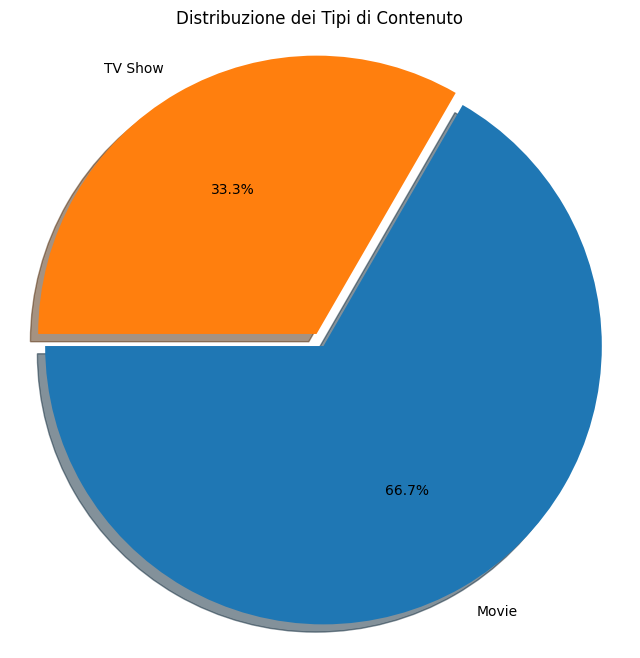

In [29]:
data = {
    'type': ['Movie', 'TV Show', 'Movie', 'TV Show', 'Movie', 'Movie']
}
df = pd.DataFrame(data)
plt.figure(figsize=(8, 8)) 
conteggi_tipi = df['type'].value_counts()
sizes = conteggi_tipi.values
labels = conteggi_tipi.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, shadow=True, explode=(0.05, 0)) 
plt.title('Distribuzione dei Tipi di Contenuto') 
plt.axis('equal')
plt.show()

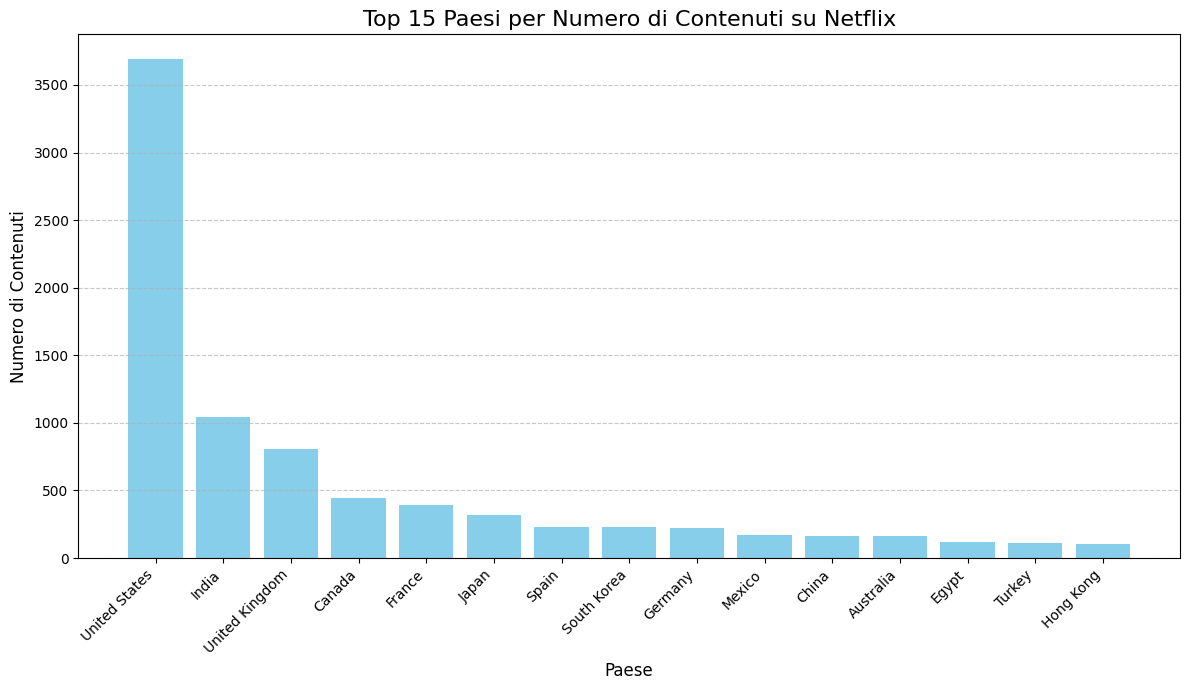

In [ ]:
df_pulito_paesi = df.dropna(subset=['country']).copy()

paesi_singoli = df_pulito_paesi['country'].str.split(',').explode().str.strip()

country_series = paesi_singoli.value_counts()

top_n = 15
top_paesi = country_series.head(top_n)

plt.figure(figsize=(12, 7))

plt.bar(top_paesi.index, top_paesi.values, color='skyblue')

plt.xlabel('Paese', fontsize=12)
plt.ylabel('Numero di Contenuti', fontsize=12)
plt.title(f'Top {top_n} Paesi per Numero di Contenuti su Netflix', fontsize=16)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [36]:
df['date_added'] = pd.to_datetime(df['date_added'])

df['year_added'] = df['date_added'].dt.year

df.dropna(subset=['year_added'], inplace=True)
df['year_added'] = df['year_added'].astype(int)

additions_by_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(additions_by_year.index, additions_by_year.values, marker='o', linestyle='-', color='skyblue')

plt.title('Andamento Annuale delle Aggiunte di Contenuti su Netflix', fontsize=16)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Numero di Contenuti Aggiunti', fontsize=12)

plt.xticks(additions_by_year.index, rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1442. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.